In [1]:
#import packages
import pandas as pd
import numpy as np
import random
import re
import string
#import requests
#import plotnine 
#from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#may need to pip install first
#!pip install netwulf
from netwulf import visualize
import netwulf as nw
import networkx as nx


# Data Prep

## Load in Data

In [2]:
# Define the file path
pre_file_path = '../code/data/Med student pre assessment 2.8.23.csv'
foundational_file_path = '../code/data/Foundational Post Assessment 2.8.23.csv'
intermediate_file_path = '../code/data/intermediate post assessment 2.8.23.csv'
advanced_file_path = '../code/data/Advanced post assessment 2.8.23.csv'

# Load the datasets using pandas
pre_data = pd.read_csv(pre_file_path)
post_data_foundational = pd.read_csv(foundational_file_path,skiprows =lambda x: x in [1,2])
post_data_intermediate = pd.read_csv(intermediate_file_path,skiprows =lambda x: x in [1,2])
post_data_advanced = pd.read_csv(advanced_file_path,skiprows =lambda x: x in [1,2])


## Merge Data

In [3]:
#merge pre to foundational post, where scox = pre score, scoy = post score
joined_data_foundational = pd.merge(post_data_foundational, pre_data, on = "IPAddress", how = "left")
joined_data_intermediate = pd.merge(post_data_intermediate, pre_data, on = "IPAddress", how = "left")
joined_data_advanced = pd.merge(post_data_advanced, pre_data, on = "IPAddress", how = "left")


## Rename columns

In [4]:
#renaming the columns, SC0y = pre, SC0x = post for clarity:
foundational_data = joined_data_foundational.rename(columns={'SC0_y':'Pre', 'SC0_x':'Post'})
#drop missing data from Pre and Post
foundational_data = foundational_data.dropna(subset=['Pre', 'Post'])

#do the same for two other cohorts
intermediate_data = joined_data_intermediate.rename(columns={'SC0_y':'Pre', 'SC0_x':'Post'})
intermediate_data = intermediate_data.dropna(subset=['Pre', 'Post'])

advanced_data = joined_data_advanced.rename(columns={'SC0_y':'Pre', 'SC0_x':'Post'})
advanced_data = advanced_data.dropna(subset=['Pre', 'Post'])

## Data prep for correlation plot

In [5]:
#select 'Pre' and 'Post' columns and tag each entry with its cohort
advanced_scores = advanced_data[['Pre','Post']].copy()
advanced_scores['Cohort'] = 'Advanced'

intermediate_scores = intermediate_data[['Pre','Post']].copy()
intermediate_scores['Cohort'] = 'Intermediate'

foundational_scores = foundational_data[['Pre','Post']].copy()
foundational_scores['Cohort'] = 'Foundational'
#
#combine the datasets for analysis
all_scores = pd.concat([advanced_scores, intermediate_scores, foundational_scores])
all_scores[['Pre', 'Post']] = all_scores[['Pre', 'Post']].astype(int)

## Code for correlation test

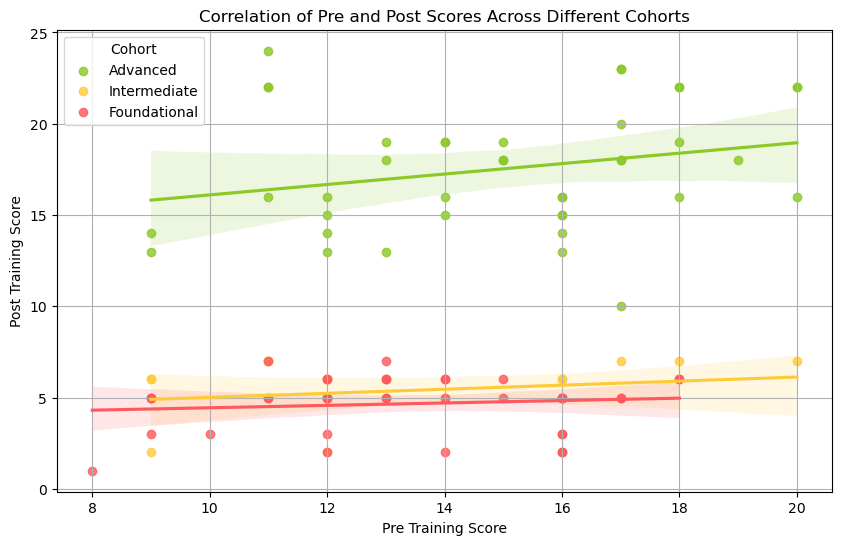

In [7]:
#create a color palette for the cohorts
#got hex codes from coolors
cohort_colors = {
    'Advanced': '#8ac926',  # green
    'Intermediate': '#ffca3a',  # yellow
    'Foundational': '#ff595e'  # red
}

#create regression plots for each cohort with customized colors
plt.figure(figsize=(10, 6))
for cohort, color in cohort_colors.items():
    sns.regplot(data=all_scores[all_scores['Cohort'] == cohort],
                x='Pre', y='Post', color=color, label=cohort)

#add titles and labels
plt.title('Correlation of Pre and Post Scores Across Different Cohorts')
plt.xlabel('Pre Training Score')
plt.ylabel('Post Training Score')
plt.legend(title='Cohort')
#plt.savefig('correlation_plot.png')
plt.grid(True)